# Preparations

In [1]:
import Pkg
Pkg.DEFAULT_IO[] = stdout;

#### Fetch Required Packages

In [7]:
using DiffEqFlux, Flux
using Latexify

#### Fetch Global Files

In [17]:
include("../Codebase/Functions/model_structure.jl");
include("../Codebase/Functions/simulation_functions.jl");
include("../Codebase/Functions/steady_state_functions.jl");
include("../Codebase/Functions/file_managment_functions.jl");
include("../Codebase/Functions/make_bifurcation_diargam.jl");
include("../Codebase/Functions/plotting_functions.jl");

┌ Info: Precompiling Catalyst [479239e8-5488-4da2-87a7-35f2df7eef83]
└ @ Base loading.jl:1423
┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1423
┌ Info: Precompiling BifurcationKit [0f109fa4-8a5d-4b75-95aa-f515264e7665]
└ @ Base loading.jl:1423
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


#### Other

In [19]:
gr(); 
mm = Plots.mm
default(framestyle=:box,grid=false,fmt=:png,guidefontsize=14);

# Analysis

## Functionalities Network Figure

### Declare the model

In [34]:
genSigSys = @reaction_network begin
    (v0 + (S*σ)^n / ((S*σ)^n + (D*A)^n + 1),d), ∅ ↔ σ
    (σ/τ,1/τ), ∅ ↔ A
end S D τ v0 n d η;

### Make simulations

In [58]:
p = [5.0,5.0,100.0,0.05,3,0.05,0.05]          # Sets parameter values.
tspan = (0.,1000.)                            # Sets the time span.
u0 = [0.5,0.1]                                # Sets initial condition.
rre_sol = detsim(genSigSys,p,tspan;u0=u0)     # Makes a deterministic simulation.
rre_sim_plot = plot(rre_sol,lw=9,la=0.8,xguide="Time (au)",yguide="Concentration (au)")

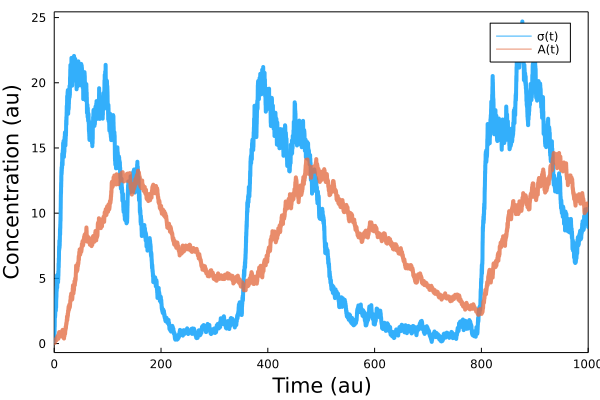

In [64]:
p = [5.0,5.0,100.0,0.05,3,0.05,0.5]
tspan = (0.,1000.)
u0 = [0.5,0.1]
cle_sol = stochsim(genSigSys,p,tspan;u0=u0,adaptive=false,dt=0.001)     # Makes a stochastic simulation (did use fixed time stepping).
cle_sim_plot = plot(cle_sol,lw=4,la=0.8,xguide="Time (au)",yguide="Concentration (au)")

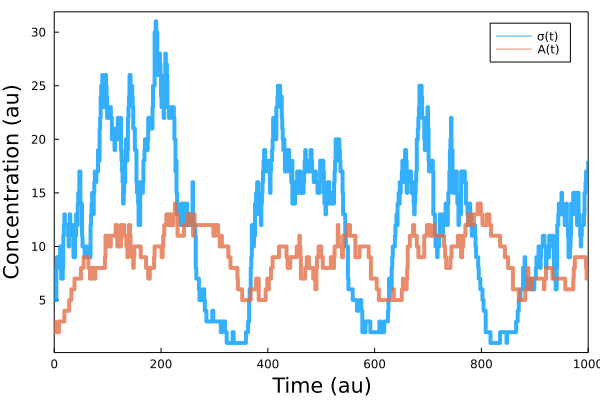

In [65]:
p = [5.0,5.0,100.0,0.05,3,0.05,1.0]
tspan = (0.,1000.)
u0 = [5,2]
ssa_sol = ssasim(genSigSys,p,tspan;u0=u0)     # Makes a gillespie simulation.
ssa_sim_plot = plot(ssa_sol,lw=4,la=0.8,xguide="Time (au)",yguide="Concentration (au)")

In [210]:
save_figure(plot!(rre_sim_plot,xticks=[],yticks=[]),"Feature_Diagram";tag="RRE_")
save_figure(plot!(cle_sim_plot,xticks=[],yticks=[]),"Feature_Diagram";tag="CLE_")
save_figure(plot!(ssa_sim_plot,xticks=[],yticks=[]),"Feature_Diagram";tag="SSA_")

### Display network

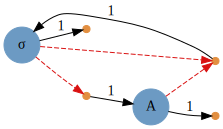

Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/fonts.conf", line 5: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/10-hinting-slight.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/10-scale-bitmap-fonts.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/20-unhint-small-vera.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/30-metric-aliases.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/40-nonlatin.c

In [67]:
Graph(genSigSys)

In [208]:
latexify(genSigSys)    # Seems to be some minor problem in Latexify right bow, causing problem with this.

LoadError: MethodError: no method matching ^(::Sym{SymbolicUtils.FnType{Tuple{Any}, Real}, Nothing}, ::Int64)
[0mClosest candidates are:
[0m  ^([91m::Union{AbstractChar, AbstractString}[39m, ::Integer) at ~/julia-1.7.0/share/julia/base/strings/basic.jl:721
[0m  ^([91m::Union{AbstractAlgebra.Generic.PuiseuxSeriesFieldElem{T}, AbstractAlgebra.Generic.PuiseuxSeriesRingElem{T}}[39m, ::Int64) where T<:AbstractAlgebra.RingElement at ~/.julia/packages/AbstractAlgebra/yXuIT/src/generic/PuiseuxSeries.jl:509
[0m  ^([91m::Union{AbstractAlgebra.Generic.LaurentSeriesFieldElem{T}, AbstractAlgebra.Generic.LaurentSeriesRingElem{T}}[39m, ::Int64) where T<:AbstractAlgebra.RingElement at ~/.julia/packages/AbstractAlgebra/yXuIT/src/generic/LaurentSeries.jl:853
[0m  ...

In [70]:
latexify(convert(ODESystem, genSigSys))

L"\begin{align}
\frac{d\sigma(t)}{dt} =& v0 + \frac{\left( S \sigma\left( t \right) \right)^{n}}{1 + \left( D A\left( t \right) \right)^{n} + \left( S \sigma\left( t \right) \right)^{n}} - d \sigma\left( t \right) \\
\frac{dA(t)}{dt} =& \frac{ - A\left( t \right)}{\tau} + \frac{\sigma\left( t \right)}{\tau}
\end{align}
"

### Bifurcation Diagram

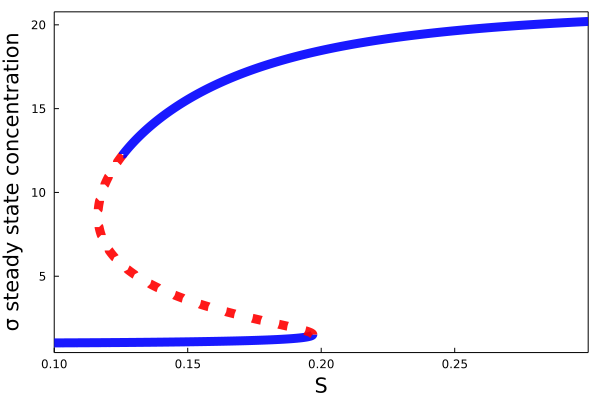

In [37]:
#bif = BifurcationDiagram(genSigSys,[5.0,0.1,100.0,0.05,3,0.05,0.05],(0.1,0.3),:S)      # Creates a bifurcation diagram using BifurcationKit and the preprepared helper function in Codebase.
bif_plot = plot_bif(bif,lw=9,la=0.9,yguide="σ steady state concentration")

In [211]:
save_figure(plot!(bif_plot,xticks=[],yticks=[]),"Feature_Diagram";tag="Bifurcation_Diargam_")

### Parameter Fitting

In [122]:
tspan = (0.,1000.)
u0 = [10.0,5.0]
p = [5.0,5.0,100.0,0.05,3,0.05,0.05];

In [123]:
sample_times = range(tspan[1],stop=tspan[2],length=100)     # Times where teh data samples are taken.
sol_real = detsim(genSigSys,p,tspan;u0=u0)                  # Makes the real simulation (using RRE).
sample_vals = [sol_real.u[findfirst(sol_real.t .>= ts)][var] * (1+(0.1rand()-0.05)) for var in 1:2, ts in sample_times];  # Takes the (perturbed) data samples at the sample times.

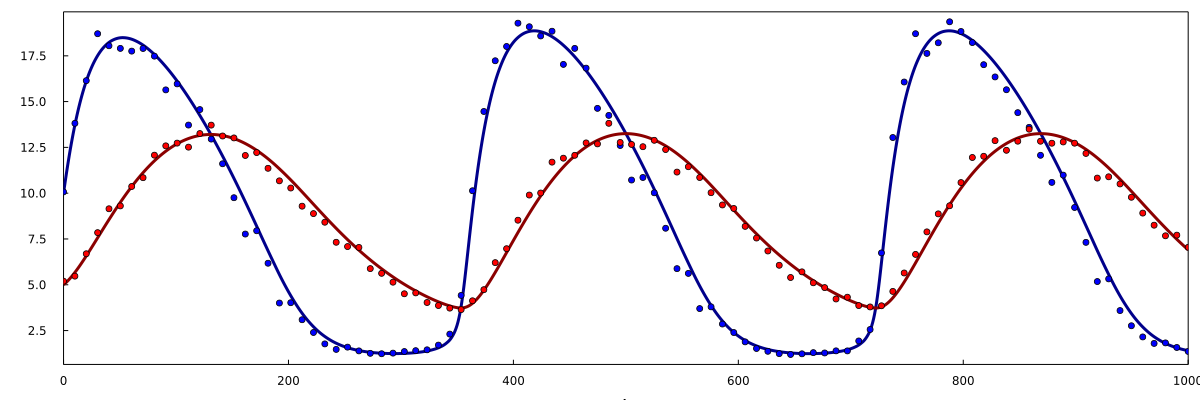

In [124]:
# Plots the real solution and samples (just to check).
plot(sol_real,size=(1200,400),label="",framestyle=:box,lw=3,color=[:darkblue :darkred])
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label="")

In [181]:
# Makes function to fit a parameter set to the data, for some initial parameter value and a limited time-frame.
function optimise_p(p_init,tend)
    function loss(p_in)
        #any(p .< 0) && (return 1000000,sol_real)
        p = copy(p_in);
        (p[4]<0) && (p[4] = -p[4])
        rre_sol = detsim(genSigSys,p,(0.,tend);u0=u0, tstops=sample_times,callbacks=(positive_domain(),))
        vals = hcat(map(ts -> rre_sol.u[findfirst(rre_sol.t .>= ts)], sample_times[1:findlast(sample_times .<= tend)])...)    
        loss = sum(abs2, vals .- sample_vals[:,1:size(vals)[2]])   
        return loss, sol
    end
    return DiffEqFlux.sciml_train(loss,p_init,maxiters = 100)
end;

In [187]:
# Need to run this in several iterations, for the fitting algorithm to handle oscillations.
p0 = [4.0,5.0,100.0,0.04,3,0.05,0.05];
t1 = 100.0;
p_estimate = optimise_p(p0,t1).minimizer

┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


7-element Vector{Float64}:
   4.079182804820216
   4.9425719189644255
 100.07538170649653
   0.07725796226170681
   2.989852319883904
   0.04773930203507644
   0.05

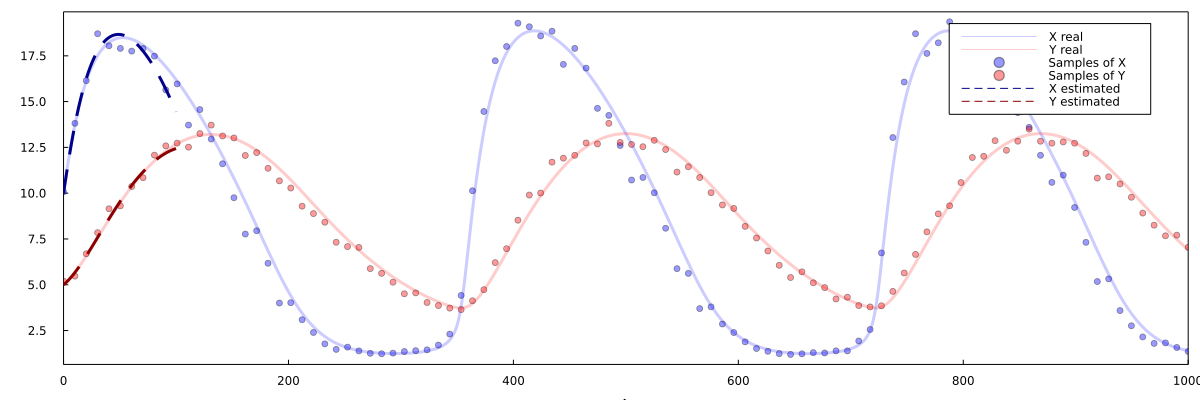

In [188]:
# Fits on the interval (0.0,t1), and plots the solution.
sol_estimate =  detsim(genSigSys,p_estimate,(0.,t1);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


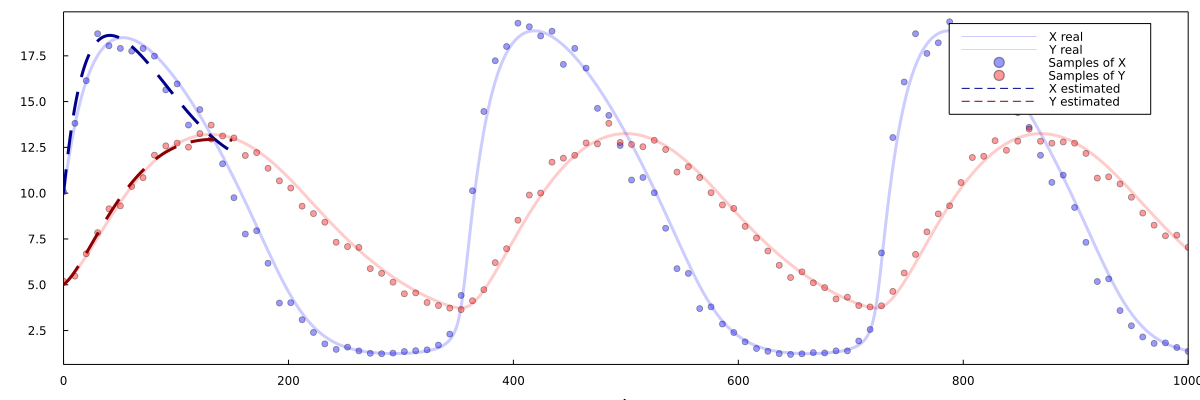

In [189]:
# Fits on the interval (0.0,t2), and plots the solution. uses the previous paraemter set to start the fitting.
t2 = 150.0;
p_estimate = optimise_p(p_estimate,t2).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t2);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


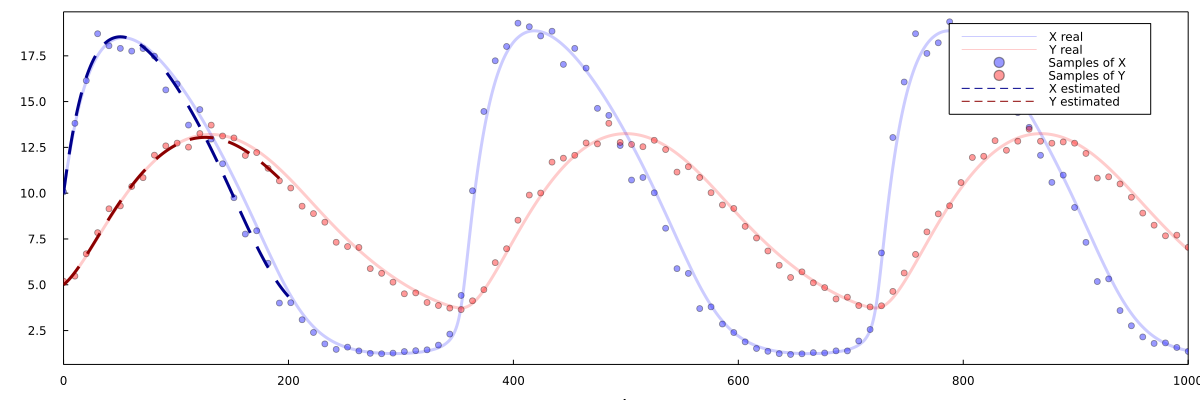

In [190]:
t3 = 200.0;
p_estimate = optimise_p(p_estimate,t3).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t3);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

In [192]:
t4 = 250.0;
p_estimate = optimise_p(p_estimate,t4).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t4);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


In [193]:
t5 = 350.0;
p_estimate = optimise_p(p_estimate,t5).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t5);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


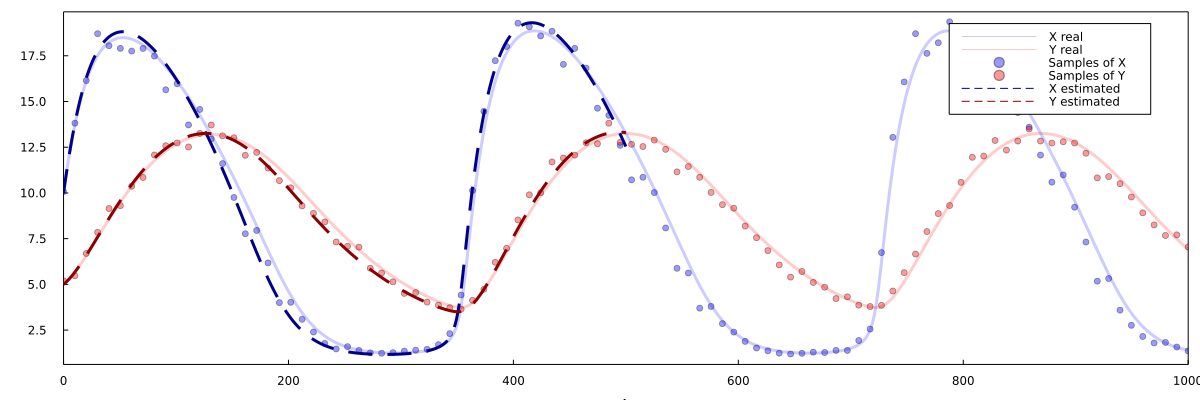

In [194]:
t6 = 500.0;
p_estimate = optimise_p(p_estimate,t6).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t6);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


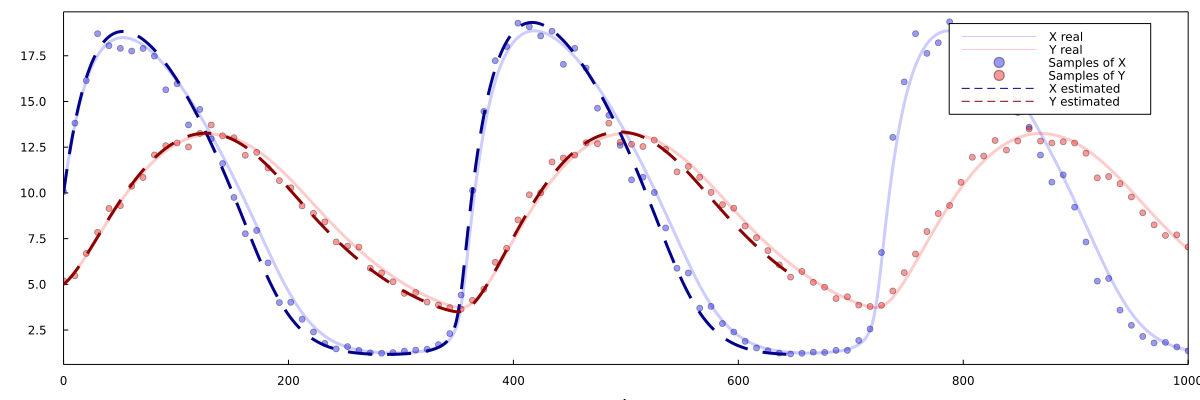

In [195]:
t7 = 650.0;
p_estimate = optimise_p(p_estimate,t7).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t7);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

┌ Warning: AD methods failed, using numerical differentiation. To debug, try ForwardDiff.gradient(loss, θ) or Zygote.gradient(loss, θ)
└ @ DiffEqFlux /home/torkelloman/.julia/packages/DiffEqFlux/jpIWG/src/train.jl:71


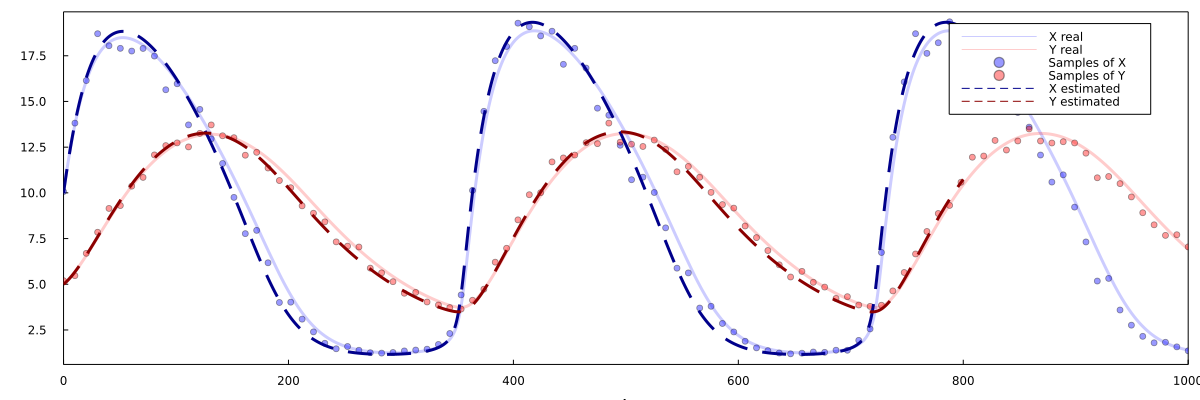

In [196]:
t8 = 800.0;
p_estimate = optimise_p(p_estimate,t8).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t8);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

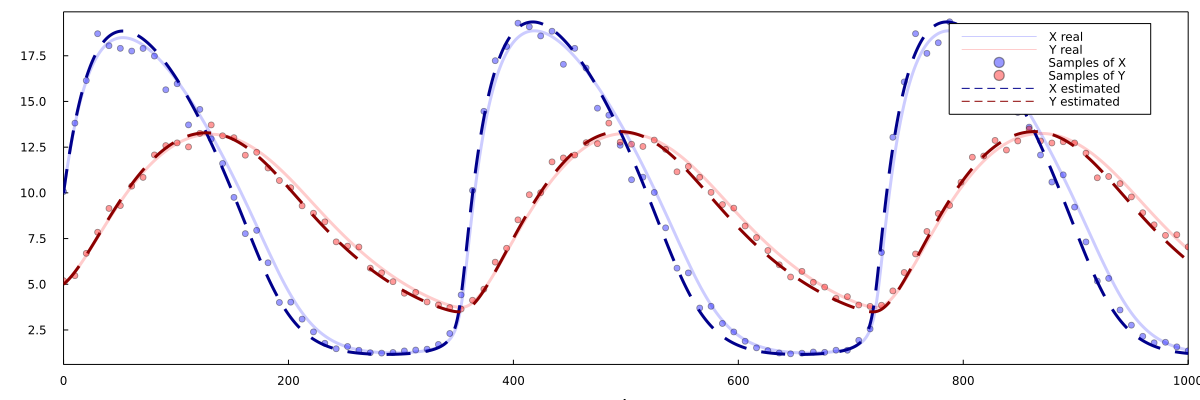

In [197]:
t9 = 1000.0;
p_estimate = optimise_p(p_estimate,t9).minimizer

sol_estimate =  detsim(genSigSys,p_estimate,(0.,t9);u0=u0, tstops=sample_times)
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

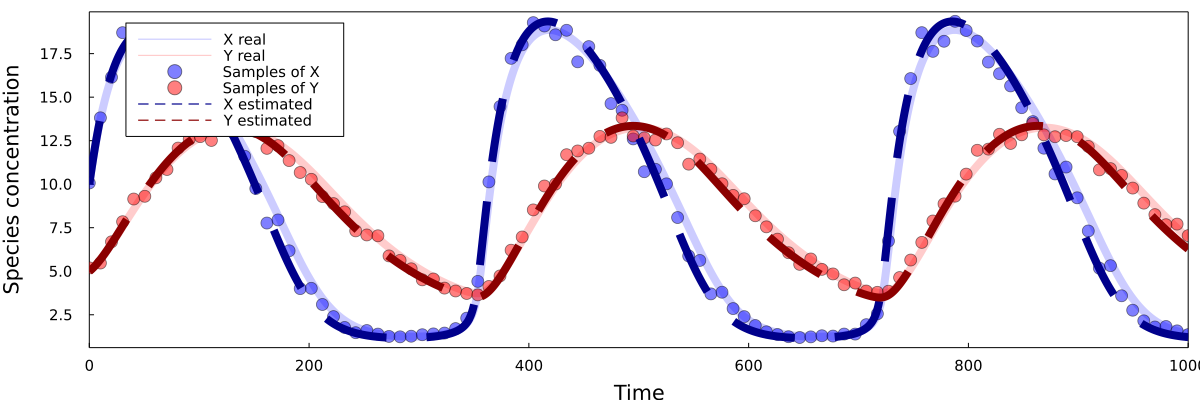

In [203]:
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=8,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.5,markersize=7)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=8,label=["X estimated" "Y estimated"],xlimit=tspan)
param_estim_plot = plot!(xguide="Time",yguide="Species concentration",bottom_margin=5mm,left_margin=6mm,guidefontsize=14,tickfontsize=10,legend=:topleft,legendfontsize=10)

In [212]:
save_figure(plot!(param_estim_plot,xticks=[],yticks=[]),"Feature_Diagram";tag="Parameter_Fitting_")

## Basic Functionality Figures

### Make Simulations

This is carried out pretty much like in the feature diagram part.

In [213]:
# Declare the mode
brusselator = @reaction_network begin
    A, 0 --> X
    1, 2X + Y --> 3X
    B, X --> Y
    1, X --> 0
end A B;

In [244]:
using DifferentialEquations
u0 = [0., 0.]
tspan = (0., 60.)
p = [1.0, 4.0]
ode_problem = ODEProblem(brusselator,u0,tspan,p)
sol = DifferentialEquations.solve(ode_problem,Rosenbrock23());

In [245]:
using Plots
brusselator_rre_plot = plot(sol,lw=10,la=0.7,ylimit=(0.,15.))

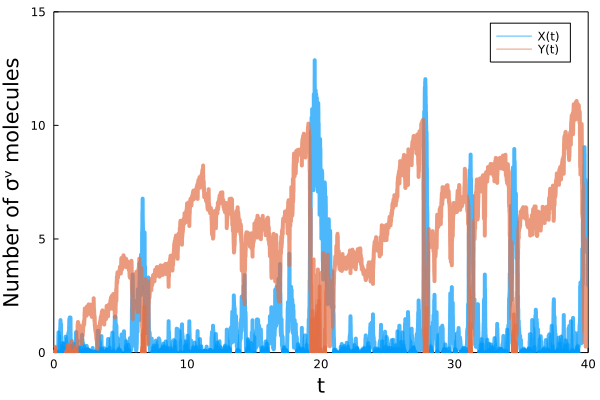

In [241]:
using DifferentialEquations
u0 = [0., 0.]
tspan = (0., 40.)
p = [1.0, 4.0]
sde_problem = SDEProblem(brusselator,u0,tspan,p)
sol = DifferentialEquations.solve(sde_problem,ImplicitEM(),adaptive=false,dt=0.00001)
brusselator_cle_plot = plot(sol,lw=4,la=0.7,ylimit=(0.,15.))

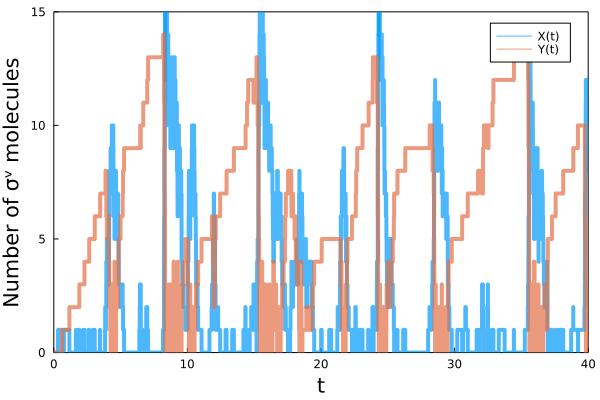

In [242]:
u0 = [0, 0]
tspan = (0., 40.)
p = [3.0, 4.0]
discrete_problem = DiscreteProblem(brusselator,u0,tspan,p)
jump_problem = JumpProblem(brusselator,discrete_problem,Direct())
sol = DifferentialEquations.solve(jump_problem,SSAStepper())
brusselator_ssa_plot = plot(sol,lw=4,la=0.7,ylimit=(0.,15.))

In [243]:
save_figure(brusselator_rre_plot,"RRE_Simulation")
save_figure(brusselator_cle_plot,"CLE_Simulation")
save_figure(brusselator_ssa_plot,"SSA_Simulation")

### Display networks

This is carried out pretty much like in the feature diagram part.

In [235]:
using Catalyst
rn = @reaction_network begin
    (1,1), X <--> Y
end
Graph(rn)

Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/fonts.conf", line 5: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/10-hinting-slight.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/10-scale-bitmap-fonts.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/20-unhint-small-vera.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/30-metric-aliases.conf", line 4: unknown element "description"
Fontconfig warning: "/home/torkelloman/.julia/artifacts/387d89822da323c098aba6f8ab316874d4e90f2e/etc/fonts/conf.d/40-nonlatin.c

In [239]:
rn = @reaction_network begin
    p, 0 --> (X,Y)
    d, (X,Y) --> 0
    (kB,kD), X+Y <--> XY
end v K p d kB kD;

In [237]:
latexify(rn)

L"\begin{align}
\require{mhchem}
\ce{ \varnothing &->[p] X}\\
\ce{ \varnothing &->[p] Y}\\
\ce{ X &->[d] \varnothing}\\
\ce{ Y &->[d] \varnothing}\\
\ce{ X + Y &<=>[kB][kD] XY}
\end{align}
"

In [238]:
latexify(convert(ODESystem,rn))

L"\begin{align}
\frac{dX(t)}{dt} =& p + kD \mathrm{XY}\left( t \right) - d X\left( t \right) - kB X\left( t \right) Y\left( t \right) \\
\frac{dY(t)}{dt} =& p + kD \mathrm{XY}\left( t \right) - d Y\left( t \right) - kB X\left( t \right) Y\left( t \right) \\
\frac{dXY(t)}{dt} =&  - kD \mathrm{XY}\left( t \right) + kB X\left( t \right) Y\left( t \right)
\end{align}
"

## Advanced Functionalities Figure

### Bifurcation diagram

This is carried out pretty much like in the feature diagram part.

In [38]:
general_network = @reaction_network begin
    (v0 + (S*σ)^n / ((S*σ)^n + (D*A3)^n + 1),1.), ∅ ↔ σ
    (τ*σ,τ), ∅ ↔ A1
    (τ*A1,τ), ∅ ↔ A2
    (τ*A2,τ), ∅ ↔ A3
end S D τ v0 n η
general_model = Model(general_network,[1.0,0.5,0.1,0.1,3,0.0]);

##################################################
---> Automatic computation of bifurcation diagram

────────────────────────────────────────────────────────────────────────────────
--> New branch, level = 2, dim(Kernel) = 1, code = 0, from bp #1 at p = 2.5006326348908536, type = bp
- #  1,    bp at p ≈ +2.50063263 ∈ (+2.50063263, +2.50063264), |δp|=2e-10, [converged], δ = ( 1,  0), step = 363, eigenelements in eig[364], ind_ev =   1
────────────────────────────────────────────────────────────────────────────────
--> New branch, level = 2, dim(Kernel) = 1, code = 0, from bp #2 at p = 1.6582609749671826, type = bp
- #  2,    bp at p ≈ +1.65826097 ∈ (+1.65826097, +1.65826097), |δp|=2e-10, [    guess], δ = ( 1,  0), step = 610, eigenelements in eig[611], ind_ev =   2


┌ Info: It seems the point is a Saddle-Node bifurcation.
│ The normal form is aδμ + b1⋅x + b2⋅x^2 + b3⋅x^3
│  with coefficients 
│ (a = 0.12532131557762707, b1 = 0.9178976324935474, b2 = 5.483497637396303, b3 = -19.82476315910355).
└ @ BifurcationKit /home/SLCU/torkel.loman/.julia/packages/BifurcationKit/DKJDA/src/NormalForms.jl:197
┌ Info: It seems the point is a Saddle-Node bifurcation.
│ The normal form is aδμ + b1⋅x + b2⋅x^2 + b3⋅x^3
│  with coefficients 
│ (a = -3.4317934088709645, b1 = -1576.7615327632036, b2 = 4.714791999003453, b3 = 6503.9582652055915).
└ @ BifurcationKit /home/SLCU/torkel.loman/.julia/packages/BifurcationKit/DKJDA/src/NormalForms.jl:197


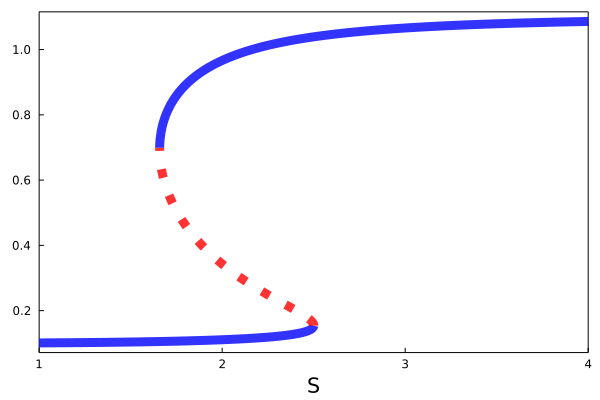

In [41]:
p_span = (1.,4.)
bif = BifurcationDiagram(general_model,p_span,:S);
bif_plot = plot_bif(bif;lw=9,la=0.8,legend=:none,xlimit=p_span,lsU=:dot)

In [23]:
save_figure(bif_plot,"Advanded_Functionalities";tag="Bifurcation_Diagram_")

### Parameter Fitting

This is carried out pretty much like in the feature diagram part.

In [24]:
brusselator = @reaction_network begin
    A, ∅ → X
    1, 2X + Y → 3X
    B, X → Y
    1, X → ∅
end A B
p_real = [1., 2.];

In [25]:
u0 = [1.0, 1.0]
tspan = (0.0, 30.0)

sample_times = range(tspan[1],stop=tspan[2],length=100)
prob = ODEProblem(brusselator, u0, tspan, p_real)
sol_real = DifferentialEquations.solve(prob, Rosenbrock23(), tstops=sample_times)

sample_vals = [sol_real.u[findfirst(sol_real.t .>= ts)][var] * (1+(0.1rand()-0.05)) for var in 1:2, ts in sample_times];

In [26]:
using Plots
plot(sol_real,size=(1200,400),label="",framestyle=:box,lw=3,color=[:darkblue :darkred])
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label="")

In [27]:
function optimise_p(p_init,tend)
    function loss(p)
        sol = DifferentialEquations.solve(remake(prob,tspan=(0.,tend),p=p), Rosenbrock23(), tstops=sample_times)
        vals = hcat(map(ts -> sol.u[findfirst(sol.t .>= ts)], sample_times[1:findlast(sample_times .<= tend)])...)    
        loss = sum(abs2, vals .- sample_vals[:,1:size(vals)[2]])   
        return loss, sol
    end
    return DiffEqFlux.sciml_train(loss,p_init,ADAM(0.1),maxiters = 100)
end;

In [28]:
p_estimate = optimise_p([5.,5.],10.).minimizer

2-element Vector{Float64}:
 1.0088667378119143
 2.030207857857842

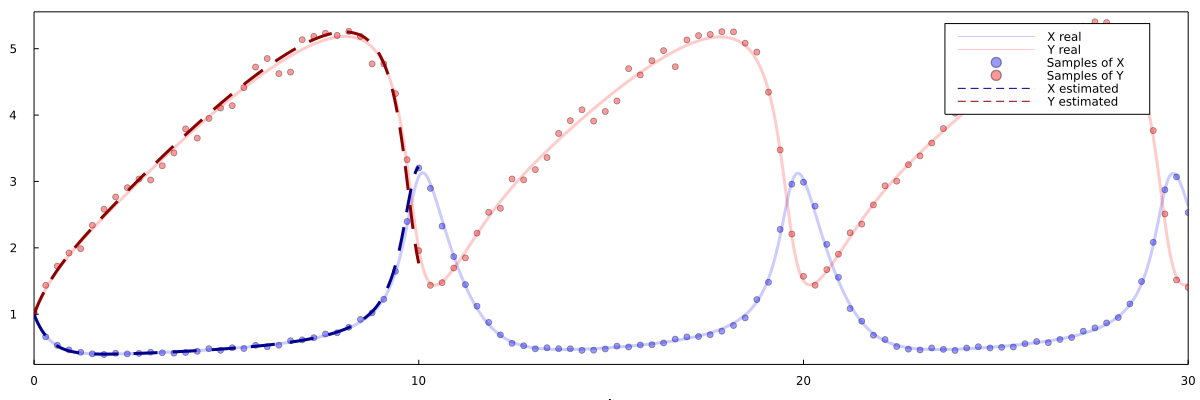

In [29]:
sol_estimate = DifferentialEquations.solve(remake(prob,tspan=(0.,10.),p=p_estimate), Rosenbrock23())
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

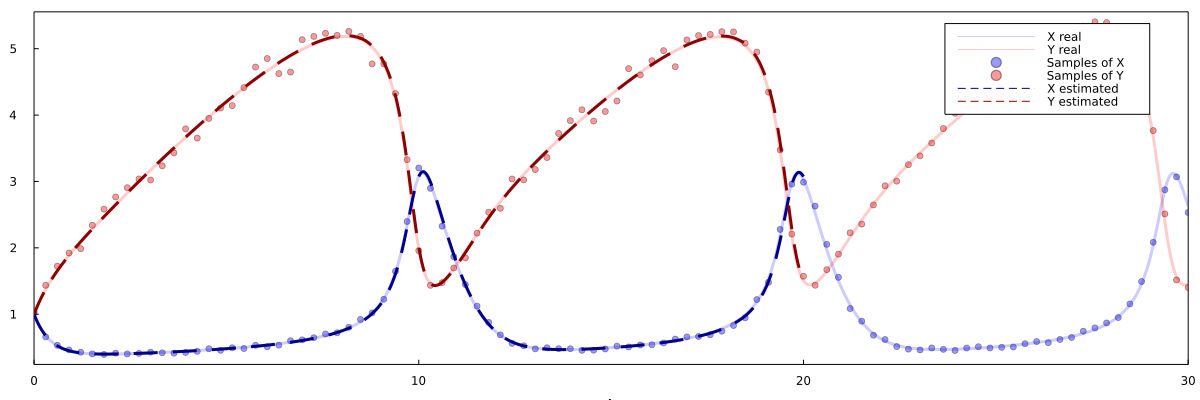

In [30]:
p_estimate = optimise_p(p_estimate,20.).minimizer

sol_estimate = DifferentialEquations.solve(remake(prob,tspan=(0.,20.),p=p_estimate), Rosenbrock23())
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=3,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.4)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=3,label=["X estimated" "Y estimated"],xlimit=tspan)

In [31]:
p_estimate = optimise_p(p_estimate,30.).minimizer
sol_estimate = DifferentialEquations.solve(remake(prob,tspan=(0.,30.),p=p_estimate), Rosenbrock23());

In [32]:
plot(sol_real,size=(1200,400),color=[:blue :red],framestyle=:box,lw=8,label=["X real" "Y real"],linealpha=0.2)
plot!(sample_times,sample_vals',seriestype=:scatter,color=[:blue :red],label=["Samples of X" "Samples of Y"],alpha=0.5,markersize=7)
plot!(sol_estimate,color=[:darkblue :darkred], linestyle=:dash,lw=8,label=["X estimated" "Y estimated"],xlimit=tspan)
fig_pe = plot!(xguide="Time",yguide="Species concentration",bottom_margin=5mm,left_margin=6mm,guidefontsize=14,tickfontsize=10,legend=:topleft,legendfontsize=10)

In [33]:
save_figure(fig_pe,"Advanded_Functionalities";tag="Parameter_Estimation_")